# NVT

### System in thermal contact with environment

- Recall that NVE ensemble is the collection of all possible microscpoic configurations where $N$, $V$, $E$ extensive variables are fixed. E.g system is completely insulated from external world.

- In the NVT ensemble we lift the energy exchange constraint $E=const$ by bringing system in contact with a **heat bath or reservoir** which maintains a constant temperature for our system.

- In thermodynamics exchanging variable $E$ with $T$ is accomplished via Legendtre transform $F = E-TS$ which makes free energy the primary object extremum of which determines the equilibrium macrostate. 

- In the NVT ensemble the system $E_i$ and resrovir $E_r$ exchange energy and maintaint constant temperature $T$. The total energy of system+reservoir remains conserved: $E_t=E_r + E_i=const$. 

### MaxEnt perspective

- Maximizinging entropy for the $NVE$ ensemble results in unifrom probabilidy distribution over microstates $p_i = \frac{1}{\Omega}$. 

- For $NVT$, in addition to normalization $\sum_i p_i =1$ we have to add one more condition to probability distirbution over microstates. Namely probability distribution must ensure average energy! $\sum_i p_i E_i = \langle E \rangle$

$$J[p_1, p_2, ...] = - \sum _i p_i log p_i - \alpha \Big(\sum_i p_i -1 \Big) - \beta  \Big(\sum_i p_i E_i - \langle E \rangle \Big)$$

- Next we maximize entropy with all the constraints included:

$$\frac{\partial J}{\partial p_i} = 0$$

- We discover that when maximizing entropy with average energy constratin we now get expenential dependence on energies of microstates! This is one of the most fundamental results of statistical mechanics. 

$$p_i \sim exp(-\beta E_i)$$

- normalizing probbability distirbutio we obtain:

$$p_i = \frac{exp(-\beta E_i)}{\sum_i exp(-\beta E_i)} = \frac{exp(-\beta E_i)}{Z(\beta)}$$

- THe denomintaor which ensures normalization is signficiant as it is an analog of $\Omega (E)$ for system in thermal contact of environment. 

$$Z = \sum_i e^{-\beta E_i}$$

- As opposed to counting each microstate as 1 the **partition function** weighs each microstate in accordance with energy! That is low energies are exponentially more likely than higher ones. 

### Ensemble perspective

- In the $NVT$ ensembe differeng configurations can have different energy. Hence we expect probabiltiy distribution to depent on energy. 

- Energies can be partitioned between system and reervoir in $\Omega_{t}(E_t)$ number of ways

$$\Omega_{t}(E_t) = \sum_i \Omega_r(E-E_i) \cdot \Omega(E_i)$$

- But we know from thermodynamics that the entropy of the system is additive. Therefore we see that this additivity emerges because the sumation is dominated by term where the system adopts average energy $U$ which maximizes the entropy.

$$S_t = k_B log \sum_i \Omega_r(E-E_i) \cdot \Omega(E_i) \approx k_B  log \Omega_r(E-U) \cdot \Omega(U) = S_r(E_t-U) + S(U)$$

- Let us single out one micro-state $E_i$ of our system $\Omega(E_i) =1$ and see what would be its probability

$$p_i = \frac{\Omega_r(E_{t}-E_i) \cdot 1}{\Omega_{t} (E_{t})} = \frac{e^{S_r(E_{t}-E_i)/k_B}}{e^{S_{t}(E_t)/k_B}}$$

- Since entropy is a smoothly varying function of energy we can expand it around $E_{tot}$ as $E_i$ is a much smaller quantity and see that probabiltiy depends on energy exponentially.

$$S_r(E_t-E_i) \approx S_r(E_t) + \Big( \frac{\partial S_r}{\partial E}\Big)  (-E_i) = S_r(E_t) - \frac{1}{T} E_i$$

$$p_i \sim e^{-E_i/k_B T}$$

- Normalizing probabiliities we obtain same expression as what we got through MaxEnt approach

$$p_i = \frac{exp(-\beta E_i)}{Z(\beta)}$$

### Partition function and Free energy

- To gain inisght into $Z$ partion function we need to cary out a more insightful derivation by expanding system's energy around average $U = \sum_i p_i E_i$. Accordining to central limit theorem we expect fluctuations to be relatively small $U - E_i = \delta E_i \sim O(N^{1/2})$ 

$$S_r(E_{t}-E_i) = S_r(E_{t}-U + U-E_i) = S_r(E_{t}-U + \delta E_i)$$


$$S_r(E_{t}-U + \delta E_i)  \approx S_r(E_{t}-U) +\Big( \frac{\partial S_r}{\partial E}\Big) \delta E_i$$


$$S_r(E_{t}-E_i) =  S_r(E_{t}-U) +\frac{1}{T}(U-E_i)$$


$$ S_{t}(E_{t}) = S_r(E_{t}-U)+S(U)$$


**Probability of a microstate**

$$p_i = exp \Bigg[ S_r(E_{t}-E_i)/k_B - S_{t}(E_{t})/k_B \Bigg] = exp \Bigg[-\beta E_i +\beta (U-TS)\Bigg]$$


**Heat bath's contribution to the system's distribution of energies comes through the temperature**

$${ p_i = \frac{e^{-\beta E_i}}{e^{-\beta F}} = \frac{e^{-\beta E_i}}{Z} }$$

**Boltzmann distribution**

$$\boxed{p_i = \frac{e^{-\beta E_i}}{Z}}$$ 

**Partition function**

$$\boxed{Z= \sum_i e^{-\beta E_i} }$$

**Free Energy**

$$\boxed{Z = e^{-{\beta F}}}$$

$$\boxed{F = -\beta^{-1} log Z}$$

### Computing Z via classical vs quantum mechanics

**Quantum Mechanics**

- Counting in quantum emchanics requires knowing the solutions to Schrodinger equation $H |\psi_i\rangle = E_i | \psi_i\rangle$ whcih are used for constructing parition function:

$$\boxed{Z(\beta) = \sum_i e^{-\beta E_i}}$$

- Given the huge degenerace for N "particle" thermodynamic systems the partion function can also be written as a sum over the energy values $E$ instead of eigenvalues:

$$\boxed{Z(\beta) = \int \Omega(E) e^{-\beta E}dE}$$

**Classical Mechanics**

- Recall taht counting microstates in classical mechanics is done by discretizing phase space $\Gamma = (x^{3N}, p^{3N})$ into the smallest possible quantum units $dxdp\sim h$. In other words we replace summation over quantum states with integral over phase space $\sum_i \rightarrow \int \frac{dpdx}{h}$

- Recall that we need to correct classical mechanics for "double counting" microstates if we have N indinstinguishable "particles" with a factor of $N!$  

$$\Omega(E) = \frac{1}{N! h^{3N}} \int_{\Gamma}  \delta \big( H(\Gamma)-E) d \Gamma$$

$$Z(\beta) = \int_{E} \Omega(E) e^{-\beta E} dE  = \frac{1}{N! h^{3N}} \int_{\Gamma} \Bigg[\int_{E} d \Gamma \delta \big( H(\Gamma)-E) e^{-\beta E}dE \Bigg] d\Gamma$$

$$\boxed{Z(\beta) = \frac{1}{N! h^{3N}} \int_{\Gamma} e^{-\beta H(\Gamma)} d\Gamma}$$

### A closer look at the the partiation function Z

$$\boxed{Z(\beta) = \int \Omega(E) e^{-\beta E}dE = \int e^{-\beta (E-T S(E))}dE }$$

- $\Omega(E)\sim e^N$ rapidly increasing function with N eacsue of limit theorems: e.g the large deviation, central limit theorem, law of large numbers. 

- $e^{-\beta E}\sim e^{-N}$ rapidly decreasing function with N


- Thermodynamic limit $N, V\rightarrow \infty$ and $N/V \rightarrow const$ only the region of energy survivies hat guarantees non-negligible contribution

$$\boxed{Z = \int e^{-\beta (E-TS)}dE \approx e^{min_E [-\beta(E-TS)]} = e^{-\beta(U-TS)} = e^{-\beta F}}$$

- Where $U =\langle E \rangle$ is the thermodynamic average energy, flucutatins around which are on order of $O(N^{1/2})$

- It can be seen that $Z$, the partition function of NVT is **Laplace Transform** of density of states of NVE. While connection between energy and free energy $F= E -TS$ is via **Legendre Transform** 

Text(0.5, 0, '$E$')

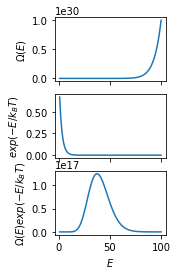

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N=10
kbT = 2.5

E = np.linspace(1, 10*N, 100)
omega  = E**(1.5*N)
boltzf = np.exp(-E/kbT)

fig,ax = plt.subplots(nrows=3,sharex=True, figsize=(2, 4))
ax[0].plot(E, omega)
ax[0].set_ylabel('$\Omega(E)$')
ax[1].plot(E, boltzf)
ax[1].set_ylabel('$exp(-E/k_B T)$')
ax[2].plot(E, omega*boltzf)
ax[2].set_ylabel('$\Omega(E) exp(-E/k_B T)$')
ax[2].set_xlabel('$E$')

### Why free energy is a central quantity in the NVT ensemble.


As we have learned in Thermodynamics, after legendre transorm $NVE\rightarrow NVT$ the entropy maximiziation (energy minimization) principle gets replaced by the free energy minimization prinicple.  

Now we can show thatn indded the free energy governs probabilities of states in the NVT ensemble:

$$p_1 =\frac{\Omega (E_1) e^{-\beta E_1}}{Z} = \frac{e^{-\beta F_1}}{e^{-\beta F}}$$

Often we re interested in relative probabilities of different states, e.g conformation A vs B of polymer:

$$\frac{p_2}{p_1} = e^{-\beta (F_2-F_1)} $$

### logZ is a  cumulant generating function!

The $logZ$ besides being related to free energy also has some nice mathematical properites which allows us to extract average and fluctuations of energies by simply taking derivatives. To understand where these nice properties comes let us explore what cumulants and cumulat generating functions are:

- **Moment generation function $M(k)$**

$$M(k) = \int p(x) e^{kx} dx = \langle e^{kx} \rangle$$

$$M(k) = 1 +\langle x \rangle k + \frac{1}{2!} \langle x^2 \rangle k^2 + ...$$

- **Cumulant generation function $C(k)=log M(k)$:**

$$C(k) = log M(k) = log \langle e^{kx} \rangle$$

$$\langle e^{kx} \rangle = e^{C(k)} = e^{[1 +\langle x \rangle k + \frac{1}{2!} \langle x^2 \rangle k^2 + ...]}= 1+\kappa_1 k^2 +\kappa_2 k^2 + ...$$

First two cumulants are mean and fluctuation!

1. $\kappa_1 = \langle x \rangle$

2. $\kappa_2 = \langle (x-\langle x \rangle)^2 \rangle$ 

### Mean and fluctuations of Energy 

$$\langle E \rangle = \frac{\partial log Z}{\partial (-\beta)}$$

$$\sigma^2_E = \frac{\partial^2 log Z}{\partial \beta^2} = -\frac{\partial \langle E \rangle}{\partial \beta} = k_BT^2 C_v$$

$$\frac{\sigma_E}{\langle E\rangle} = \frac{(k_BT^2 C_v)^{1/2}}{\langle E\rangle}\sim O(N^{-1/2})$$

### Microscopic origins of quasistatic process, heat, work and entropy

$$U = \langle E\rangle =\sum_i p_i E_i$$

$$dU = \sum_i p_i dE_i + \sum_i E_i dp_i = \delta W +\delta Q$$

- From the expression we see that work is associated with deformation of energy levels with fixed population of states while entropy is associated with repopulation of states withfixed energy levels.

- Plugging in the Boltzman distribution $E_i = -\beta^{-1}( logZ + logp_i)$ we can recover the entropy exressed in terms of probability:

$$dQ = -\beta^{-1} \sum_i \Big [ log(Z)+log(p_i) \Big ] dp_i$$

- Since probability is normalized $\sum_i dp_i = d \sum_i p_i = d\, 1 = 0$ we lose a term with Z in and arrive at:

$$dQ =  -\beta^{-1} \sum_i log(p_i) dp_i$$

$$\frac{dQ}{T} = d \Big[ -k_B \sum_i log(p_i) p_i \Big] = dS$$

$$\boxed{S = -k_B p_i log p_i}$$

## The power and utility of NVT: The non-interacting system

**distinguishable states**:

$$Z = z^N$$

**indistinguishable states**:

$$ Z = \frac{1}{N!}z^N $$

**Strategy for using NVT**

1. Compute the partition function of a single particle $z= e^{-\beta \epsilon_1}+  e^{-\beta \epsilon_2}+ ...$

2. raise to the power of N and apply factorial in case of indistinguishable particles, $Z= \Big (e^{-\beta \epsilon_1}+  e^{-\beta \epsilon_2}+ ... \Big)^N$ 

3. Compute the free energy $F= - N k_B T log z$

4. Take derivatives of Z and/or free energy to get the thermodynamics. 

##  Ensemble equivalence

### Example-1: A two state model

Let us consider simple two level system where lower level $\epsilon_0 = 0$ and upper level $\epsilon_1 =\epsilon$. We will now use $NVE$ ensemble to obtian thermodynamic quantities $(S, T, C_v)$ and then obtain same quantities with $NVT$.

$$E = n\epsilon$$

$$\Omega(E) = \frac{N!}{(N-n)! n!}$$

$$S = k_B log \Omega(E) = N k_B \Big [- \frac{n}{N}log \frac{n}{N} - \frac{N-n}{N}log \frac{N-n}{N} \Big]$$

$$\frac{1}{T} = \frac{\partial S(E)}{\partial E} =  \frac{k_B}{\epsilon}\frac{\partial log\Omega(n)}{\partial  n} = \frac{k_B}{\epsilon}log \frac{N-n}{N}$$

$$\frac{n}{N} = \frac{1}{1+e^{\beta \epsilon}}$$

$$E = n\epsilon = \frac{N\epsilon}{1+e^{\beta \epsilon}}$$

### Parition function decouples non-interacting terms in energy!

<br>

$$Z = \sum^{n=N}_{n=0} e^{-\beta E_n} =  \Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)\Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)...\Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big) = (1+e^{-\beta \epsilon})^N$$

<br>

$$F= -k_B T log Z = -k_BT N log(1+e^{-\beta \epsilon})$$

<br>

$$\langle E \rangle  = \frac{\partial log Z}{\partial (-\beta)} =  \frac{N\epsilon}{1+e^{\beta \epsilon}}$$

In [25]:
from ipywidgets import interact

@interact(eps=(0.5,10, 0.5))
def E_two_sys(eps=1):
    
    N       = 1
    kbT     =  np.linspace(0,5,1000)/eps
    E_eps   = N/(1+np.exp(1/kbT))
    
    plt.plot(kbT, E_eps, lw=3)
    plt.xlabel('$k_B T/\epsilon$')
    plt.ylabel('$E/\epsilon$')

interactive(children=(FloatSlider(value=1.0, description='eps', max=10.0, min=0.5, step=0.5), Output()), _dom_…

### Example-2: Ideal gas (classical)

$$H(p^N, x^N) = K(p^N)  = \sum^{i=N}_{i=1}\frac{p^2_i}{2m}$$

$$\boxed{Z(\beta) = \frac{1}{h^{N} N!} \int dp^N dx^N e^{-\beta H(p^N,x^N)}}$$

- Let us evaluate the partion function for a single particle in 3D:

$$Z(\beta) =  \Bigg [\frac{1}{h} \int_{L} dx \int^{+\infty}_{-\infty} dp e^{-\beta \frac{p^2}{2m}}  \Bigg ]^3 = V \Big [ \frac{2\pi m}{h \beta} \Big]^{3/2} = V n_Q$$

We wrote down the partion sum in terms of volume of container and a quantum density $n_Q$ or De-Broglie thermal wavelength $\lambda_T$

> $$n_Q = \Big [ \frac{m k_B T}{2 \hbar^2} \Big]^{3/2} = \frac{1}{\lambda^3_T}$$
> $$\lambda_T = \frac{h}{2mk_BT} \sim \frac{h}{m \bar{v}}$$

- For the N particles we have:

$$Z = \frac{Z^N}{N!}  = \frac{(V n_Q)^N}{N!}$$

- Using the curdest version of Striling's approximation $N!\approx N^N e^{-N}$ we get

$$Z = \Big[ \frac{n_Q}{n}\Big]^N e^N$$

Where $n = N/V$ is the density

$$F = -k_B T log Z = -N k_B T  log \Big( \frac{n_Q}{n} \Big) - Nk_BT$$

We can also calcularte entropy and compare the expression with the one obtained from microcanonical ensemble:

$$S = -\Big( \frac{\partial F}{\partial T}\Big)_{N,V} = Nk_B log \Big( \frac{n_Q}{n} \Big) + Nk_B + \frac{3}{2}Nk_B$$

And unsurprisingly we get the same expression for entropy in the canonical ensmeble known as **Sackur-Tetrode equation**
$$S = Nk_B \Bigg[log \Big( \frac{n_Q}{n} \Big)+ \frac{5}{2} \Bigg]$$

Similarily other thermodynamic variables can be inferred by taking derivatives of free energy:

$$\langle E \rangle = \frac{\partial log Z}{\partial (-\beta)} = \frac{3}{2}N k_B T$$

- Ideal gas equation of state is obtained by calculating pressure
$$p = -\frac{\partial F}{\partial V} =\frac{N k_B T}{V}$$

- One more way of calculating entropy by using the definition of free energy
$$S = \frac{E-F}{T} = k_B N \cdot  \Big [ log \Big(\frac{V}{N \lambda^3}\Big) + \frac{5}{2}\Big]$$

### Example-3 Ideal paramagnet of spin 1/2

$$E  = -\mu B \sum^{N}_j s_j $$

- $s_j = \pm 1$ spin variable can assume two values that we refer to as up and down. 

$$Z = \sum_{E} exp(-\beta E) = \sum_{s_1, s_2, ... s_N} exp \Big( \beta \mu B \sum^{N}_j s_j \Big) = \Big [ \sum_{s_1} exp \Big( \beta \mu B  s_1 \Big) \Big ]... \Big [ \sum_{s_N} exp \Big( \beta \mu B s_N \Big) \Big ]$$

Now it is easty to see that partion function factorizes

$$Z =Z_1^N$$

$$Z_1 = \sum_{s_1} exp(\beta \mu B s_1) = exp(\beta \mu B) + exp(-\beta \mu B)  = 2 cosh(\beta \mu B)$$

**Free energy as as function of temperature and magnetic field:** Now we can establish a connection with thermodynamics by computing free energy function

$$ F(T, H) = - \beta^{-1} log Z = - N \beta^{-1} log \Big [ 2 cosh (\beta \mu B )  \Big ]$$

The entropy is obtained by taking derivative with respect to temperature

$$S = - \Big(\frac{\partial F}{\partial T} \Big)_H = k_B log \Big [ 2 cosh (\beta \mu H )  \Big ] - k_B (\beta \mu B)\cdot tanh (\beta \mu B)$$

**Magnetization**

Magnetization $M$ (extensive quantity) or magnetization per particle $m=M/N$ (intensive quantity) is given as another free energy derivative:

$$M = - \Big(\frac{\partial F}{\partial B} \Big)_T = \mu tanh \Big(\beta \mu B \Big)$$

> Note that the same expression is obtained when computing average value of magnetization as expected $M = \langle \mu \sum_{s_j} \rangle$

**Magnetizatic susceptibility**

In the context of paramagnet we have another response function in the form of magnetic susceptibility

$$\chi(T, B) =  \Big(\frac{\partial m}{\partial B} \Big)_T = \mu^2 \beta B cosh^{-2} (\beta \mu B)$$

which leads to a well known **Curie Law**

$$\chi(T, B=0) = \frac{\mu^2 }{k_B T}$$

Finally as a consitency check we can combine enetrpy and free energy expressions to obtain internal energy:


$$U = F+TS = -\mu B tanh(\beta \mu B)$$

Text(0.5, 0, 'B')

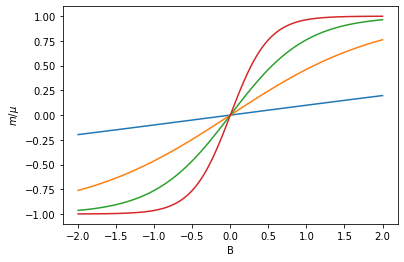

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-2, 2, 100)
for beta in [0.1, 0.5, 1, 2]:
    plt.plot(x, np.tanh(beta*x))
    
plt.ylabel('$m/\mu$')    
plt.xlabel('B')

## Non-interacting atomic and molecular gases 

### Translational degrees of freedom: particle in a box

$$E_{n_x, n_y, n_z} = \frac{\hbar^2 \pi^2}{2m L^2} \big(n^2_x+n^2_y+n^2_z \big)$$

$$ Z \approx \Bigg [\int^{\infty}_0 dn e^{-\frac{\hbar^2 \pi^2}{2m k_B TL^2}n^2} \Bigg]^{3} = V \Bigg[\frac{m k_B T}{2\pi \hbar^2} \Bigg]^{3/2} = V n_Q$$

### Rotatational degrees of freedom: Rigid rotor model 

$$E = \frac{\hbar^2}{2I} J (J+1) $$

$$Z \approx \int^{J=\infty}_{J=0} (2J+1)e^{-\Big[\beta \frac{\hbar^2}{2I} J (J+1)\Big]}\approx \frac{T}{\theta_{rot}}$$

- Where $\theta_{rot} = \frac{\hbar^2}{2 I_0 k_B}$ is called rotational temperature. 

### Vibrational degrees of freedom: Harmonic oscillator model

$$E_n = \hbar \omega (n+1/2)$$

$$z = \sum^{n=+\infty}_{n=0} = e^{-\frac{1}{2}\beta \hbar \omega} (1 + e^{-\beta\hbar\omega}+e^{-2\beta\hbar\omega}+...) = \frac{e^{-\frac{1}{2}\beta \hbar \omega}}{1-e^{-\beta\hbar\omega}}$$

$$Z = z^N$$

$$E = \frac{\partial log Z}{\partial (-\beta)} = N\hbar \omega \Big(\frac{1}{2}+ \frac{1}{1+e^{\beta\hbar\omega}} \Big) $$

- When $T \rightarrow 0$ we are left with zero point energies $E \rightarrow \frac{N \hbar \omega}{2}$

- When $T \rightarrow \infty$ we get equipartion of energy! $E \rightarrow \frac{3}{2} N k_B T$

### Partition function for a molecular gas

<br>

$$E = E_{transl}+E_{vib}+E_{rot}+E_{elec} $$

<br>

$$Z = Z_{transl} Z_{vib} Z_{rot} Z_{elec} $$

> $\frac{1}{N!}$ must go inside $Z_{tranls}$ to account for indistinguishability

### Equipartion theorem

$$U(x) = U(x_0) +U^{'}(x-x_0) +\frac{1}{2}U^{''}(x-x_0)^2 +...$$

$$U_{harm}(x) = U(x_0) +  \frac{1}{2}U^{''}(x-x_0)^2 = U_0 + \frac{1}{2}\kappa (x-x_0)^2$$

$$\langle U \rangle = \int p(x) U(x) dx = \frac{\int U(x) e^{-\beta U(x)}dx}{\int e^{-\beta U(x)}dx}$$

$$U(x) = U_0 + \frac{k_B T}{2}$$

> Notice the spring constant does not figure in the average energy expression! 

### Entropy of mixing

Consider box divided into two volumes $V$ containing $N$ number of atoms of a gas each. Let us computee the entropy of mixing when we lift the divider and allow particles to diffuse freely and mix with one another.

**Identical gas atoms A on both sides**
- The two halfs contains same gas atoms A. The entropy of initial state is twice the entropy of N particles in volume V of each side

$$S_i = 2 Nk_B \Bigg[log \Big( \frac{n_Q V}{N} \Big)+ \frac{5}{2} \Bigg]$$

- entropy of the final state is that of $2N$ particles occupying $2V$ volume
$$S_f = 2 Nk_B \Bigg[log \Big( \frac{n_Q 2V}{2N} \Big)+ \frac{5}{2} \Bigg]$$

- As a result entropy difference is zero as one should expect since atoms of gas are indistinugioshable:

$$\Delta S = S_f - S_i = 0$$

**Different gas atoms A/B**

Two different gases will make additive contribution to entropy proprotional to $N$ number of atoms.
$$S_i = Nk_B \Bigg[log \Big( \frac{n^A_Q V}{N} \Big)+ \frac{5}{2} \Bigg]+ Nk_B \Bigg[log \Big( \frac{n^B_Q V}{N} \Big)+ \frac{5}{2} \Bigg]$$

Final state enetropy is that of two non-interactiing ideal gases occupying volume $2V$

$$S_f = Nk_B \Bigg[log \Big( \frac{n^A_Q 2V}{N} \Big)+ \frac{5}{2} \Bigg]+ Nk_B \Bigg[log \Big( \frac{n^B_Q 2V}{N} \Big)+ \frac{5}{2} \Bigg]$$

$$\Delta S = 2N k_B log 2$$

## Problems

### Problem-1 Elementary derivation of Boltzmann's distirbution

Let us do an elementary derivation of Boltzman distribution showing that when a macroscopic system is in equilibrium and coupled to a heat bath at temperatere $T$ we have a universal dependence of probability for finding system at different energies: 

$$\boxed{P(r')/P(r)=e^{-\beta (U(r)-U(r'))}}$$

The essence of the derivation is this. Consider a vertical column of gas somehre in the mountains.
- On one hand we have graviational force which acts on a column between $h, h+dh$ with cross section $A$. 
- On the other hand we have pressure balance which thankfully keeps the molecules from dropping on the ground. 
- This means that we have a steady density of molecules at each distance $n(h)$ for a fixed $T$. Write down this balance of forces (gravitational vs pressure ) and find show how density at $h$, $n(h)$ is related to density at $h=0$, $n(0)$. 

> Tip: you may use $P=nkT$ for pressure and $mgh$ for the gravitational force) 

### Problem-2 Three level system



Consider a system of N classical and non-interacting particles in contact with a thermal reservoir at a temperature $T$. Each particle can have be in three states with energy $0$, $\epsilon$ or $3\epsilon$ where $\epsilon>0$. 

- Obtain an expression for $Z$ then compute the average and fluctuation of energy.

- Plot the heat capacity as a function of temperature $C_v(T)$

- Plot the average enegy as a function of temperature $U(T)$

- Plot the entropy as a function of temperature $S(T)$. 



### Problem-3 Spins on a lattice

Consider $N$ lattice sites which have quantum spins $s=1$ (not to be confused with entropy) with a mangnetic moment $\mu$. Spins are subject to a uniform mangeitc field in z direction $B=B_z$ making the energy of each spin $-\mu B m $ where $m$ is the magnetic quantum number thattakes on three possible values $m=0, \pm 1$. 

- Compute the entropy $S$ and the mangeitzation of the system $M$

- Plot entropy as a function of temperatures and study the limit of low temperatures $S(T\rightarrow 0)$



### Problem-4 2D diploes on a lattice

Consider a 2D square lattice with $M$ lattice points. On each point we have a mangeetic moment that can point in four possible directions: $+x, -x, +y, -y$. Along $y$ axis, the dipole has the energy $\epsilon>0$ and along the x axis $\epsilon=0$.

Dipoles are not interacting with each other and we also ingnore kinetic energy of diplos since they are fixed at lattice positions. 

- Write down parition function for this system $Z$

- Compute the average energy.

- Compute entropy per dipole $s(T)$. Evaluate the difference $S(T=\infty)-S(T=0)$? Can you see a link with number of arrangements of dipols?

- Compute microcanonical partition function $\Omega (N\epsilon)$

- Show that we get the same entropy expression by using $NVE$ and $NVT$ ensembles.

### Problem-5 A typical spin problem 

Due to a ligand field, the degeneracy of d-orbital of chromium ion $Cr^{3+}$ is partially lifted. The spin part of the hamiltonian that lifts this degeneracy has the following form.

$$H =  D \big(S_z^2 -S(S+1)/2 \big)$$

Where $D>0$ is some constant and $S=3/2$ (the cation has an electronic term ${F}^ 4_{3/2}$

- Conceptual question: Why can we apply statisical mechanics to a "single" ion?

- Obtain the occupation probability of each discrete energy level $P(E)$.

- Calculate the entropy and the specific heat then show that heat capacity behaves as $T^{-2}$ at high temperatures.

- Supose heat capacity is $C=k_b \Big(\frac{T}{T_0} \Big)^2$ with $T_0=0.18 K$ at higher temperatures. Determine the energy spacing. 